# Exploring processed dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting white grid style for searborn
sns.set_style("whitegrid")

In [3]:
DATASET_PATH = '../ews/data/dataset/draft_1_cp_3.csv'

In [4]:
df = pd.read_csv(DATASET_PATH)

print(f"Dataset loaded with shape: {df.shape[0]} records and {df.shape[1]} features.")

Dataset loaded with shape: 247 records and 80 features.


# Explore generated rules on dataset

In [6]:
rule_columns = [col for col in df.columns if 'has' in col.lower()]

print(len(rule_columns), "rules found in the dataset.")

66 rules found in the dataset.


# Visualizing rule proportions in dataset

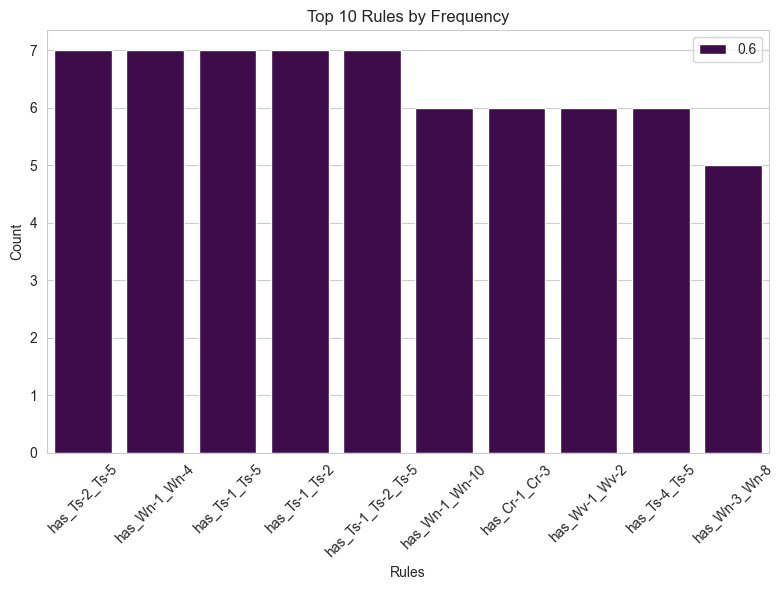

In [10]:
# Visualize top 10 rules by frequency
rule_counts = df[rule_columns].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))

sns.barplot(x=rule_counts.index, y=rule_counts.values, palette="viridis", hue=0.6)
plt.title("Top 10 Rules by Frequency")
plt.ylabel("Count")
plt.xlabel("Rules")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Analyzing all rule counts in dataset

In [16]:
# Turn rule counts into dataframe
all_rule_counts = df[rule_columns].sum().sort_values(ascending=False).reset_index()
all_rule_counts.columns = ['Rule', 'Count']

print(all_rule_counts)

                  Rule  Count
0        has_Ts-2_Ts-5      7
1        has_Wn-1_Wn-4      7
2        has_Ts-1_Ts-5      7
3        has_Ts-1_Ts-2      7
4   has_Ts-1_Ts-2_Ts-5      7
..                 ...    ...
61       has_Wn-5_Wn-8      2
62       has_Ts-6_Ts-7      2
63     has_Wn-12_Wn-16      2
64     has_Wn-12_Wn-15      2
65     has_Wn-13_Wn-16      2

[66 rows x 2 columns]


In [17]:
# Count number of matched rule per record
df['num_matched_rules'] = df[rule_columns].sum(axis=1)

In [19]:
df.head()

,Unnamed: 0,fisherman_age,fisherman_experience_years,province,coast_name,role,boat_type,detected_disaster_type,life_threatening_disaster_count,natural_signs_used,...,has_Wn-2_Wn-10,has_Wn-2_Wn-7,has_Wn-2_Wn-7_Wn-14,has_Wn-2_Wn-14,has_Wn-5_Wn-8,has_Ts-6_Ts-7,has_Wn-12_Wn-16,has_Wn-12_Wn-15,has_Wn-13_Wn-16,num_matched_rules
0,0,23,3,Aceh,Pantai Lampuuk,Anak Buah Kapal (ABK),Perahu motor tempel,B.2 Angin Kencang,2,"Wn-3, Wn-4",...,0,0,0,0,0,0,0,0,0,0
1,1,40,10,Aceh,Pantai Lampuuk,Anak Buah Kapal (ABK),Perahu motor tempel,B.2 Angin Kencang,2,"Wn-1, Wn-4, Wn-9",...,0,0,0,0,0,0,0,0,0,4
2,2,52,25,Aceh,Pantai Lampuuk,Tekong/Nahkoda,Perahu motor tempel,B.2 Angin Kencang,5,"Wn-1, Wn-4, Wn-7, Wn-10",...,0,0,0,0,0,0,0,0,0,6
3,3,52,25,Aceh,Pantai Lampuuk,Tekong/Nahkoda,Perahu motor tempel,B.3 Gelombang Ekstrim,8,Wv-2,...,0,0,0,0,0,0,0,0,0,0
4,4,49,26,Aceh,Pantai Lampuuk,Tekong/Nahkoda,Perahu motor tempel,B.1 Tsunami,1,"Ts-1, Ts-2, Ts-3, Ts-5",...,0,0,0,0,0,0,0,0,0,11
